In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('spam.csv', encoding ='ISO-8859-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns =['lables', 'data']

In [11]:
df.head()

,lables,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['b_lables'] = df['lables'].map({'ham':0, 'spam': 1})
Y =df['b_lables'].values

In [35]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], df['b_lables'], test_size =0.33)

In [36]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train) #.fit
sequences_train = tokenizer.texts_to_sequences(df_train)#similar to .transform
sequences_test = tokenizer.texts_to_sequences(df_test)

In [37]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens' % V)

Found 7242 unique tokens


In [38]:
data_train = pad_sequences(sequences_train)
print('Shape of data test tensor:', data_train.shape)

T = data_train.shape[1]

Shape of data test tensor: (3733, 121)


In [39]:
data_test = pad_sequences(sequences_test, maxlen =T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 121)


In [45]:
D = 20 # embedding dimensionality
M = 15 # hidden state dimensionality

i = Input(shape=(T,))
x = Embedding(V+1, D)(i) #first index =1 not 0, thus the final index V+1
x = LSTM(M, return_sequences =True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation ='sigmoid')(x)

model = Model(i,x)

In [46]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy'],
)

r = model.fit(
    data_train, 
    Ytrain, 
    epochs =10, 
    validation_data = (data_test, Ytest)
)


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8738 - loss: 0.4878 - val_accuracy: 0.8635 - val_loss: 0.3161
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8785 - loss: 0.2519 - val_accuracy: 0.9739 - val_loss: 0.1412
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9876 - loss: 0.1031 - val_accuracy: 0.9788 - val_loss: 0.0944
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9917 - loss: 0.0626 - val_accuracy: 0.9821 - val_loss: 0.0719
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9967 - loss: 0.0375 - val_accuracy: 0.9848 - val_loss: 0.0676
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9970 - loss: 0.0318 - val_accuracy: 0.9837 - val_loss: 0.0610
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9995 - loss: 0.0183 - val_accuracy: 0.9831 - val_loss: 0.0577
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9989 - loss: 0.0159 - val_accu

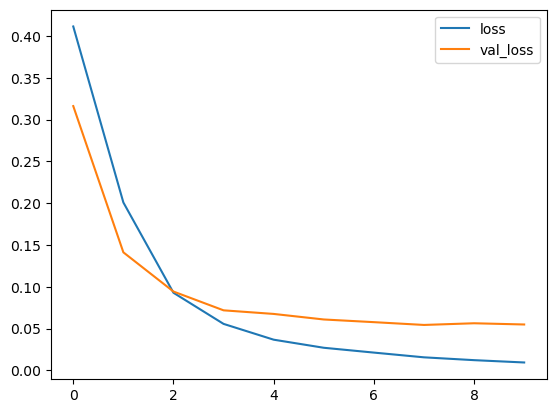

In [47]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

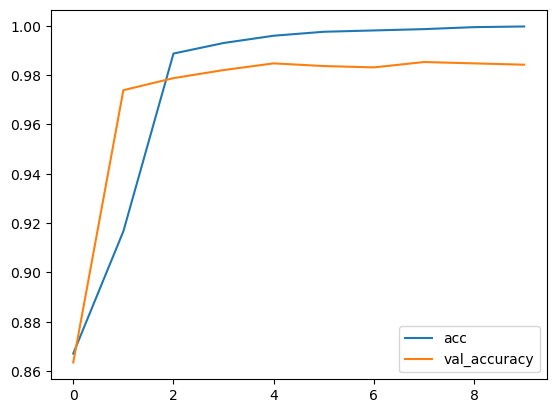

In [48]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()